In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from scipy.io.arff import loadarff 
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.io.arff import loadarff 
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.grid'] = True
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [2]:
def median(lst):
    return np.median(np.array(lst))

In [3]:
# Загружаем данные
raw_data = loadarff('messidor_features.arff')
df = pd.DataFrame(raw_data[0])

Этот набор данных содержит объекты, извлеченные из набора изображений Messidor, чтобы предсказать, содержит ли изображение признаки диабетической ретинопатии или нет. Все признаки представляют собой либо обнаруженное поражение, либо описательный признак анатомической части, либо дескриптор на уровне изображения.

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229
std,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921648,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000


In [6]:
y_column = "Class"
y = df[y_column]
y = df[y_column].astype(int)
#MultiLabelBinarizer().fit_transform(y)
X = df.drop(columns=[y_column])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_tarin, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,train_size=0.8)
X_train, X_val, y_train, y_val = train_test_split(X , y,test_size = 0.25,train_size =0.75)

In [7]:
rs = np.linspace(0,5,num=5)
acc_p = []
acc_pn = []
acc_mlp = []
acc_mlpn = []

for i in rs:
    i = int(i)
    clf = Perceptron(random_state=i, alpha=0.01, max_iter=2000)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print("Random: {}; accuracy: {}".format(i, acc))
    acc_p.append(acc)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    clf = Perceptron(random_state=i, alpha=0.01, max_iter=2000)
    clf.fit(X_train_scaled, y_train)
    predictions = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, predictions)
    # print "Perceptron with normalization: ", acc
    acc_pn.append(acc)

    mlp = MLPClassifier(random_state=i, solver="sgd", activation="tanh", alpha=0.01, hidden_layer_sizes=(20, ), max_iter=2000, tol=0.00000001)
    mlp.fit(X_train_scaled, y_train)
    predictions = mlp.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    # print "MLP: ",  acc
    acc_mlp.append(acc)

    mlp = MLPClassifier(random_state=i, solver="sgd", activation="tanh", alpha=0.01, hidden_layer_sizes=(130, 130, 130), max_iter=2000, tol=0.00000001)
    mlp.fit(X_train_scaled, y_train)
    predictions = mlp.predict(X_test_scaled)
    acc = accuracy_score(y_test, predictions)
    # print "MLP: ",  acc
    acc_mlpn.append(acc)

Random: 0; accuracy: 0.7359307359307359
Random: 1; accuracy: 0.7532467532467533
Random: 2; accuracy: 0.4458874458874459
Random: 3; accuracy: 0.45021645021645024
Random: 5; accuracy: 0.6320346320346321


In [8]:
print("Perceptron: ", min(acc_p), median(acc_p), max(acc_p), np.std(acc_p))
print("Perceptron with Norm: ", min(acc_pn), median(acc_pn), max(acc_pn), np.std(acc_pn))
print("MLP: ", min(acc_mlp), median(acc_mlp), max(acc_mlp), np.std(acc_mlp))
print("MLP with Norm: ", min(acc_mlpn), median(acc_mlpn), max(acc_mlpn), np.std(acc_mlpn))

Perceptron:  0.4458874458874459 0.6320346320346321 0.7532467532467533 0.1335018892979836
Perceptron with Norm:  0.6233766233766234 0.6883116883116883 0.7229437229437229 0.03533910239300182
MLP:  0.4458874458874459 0.4458874458874459 0.4458874458874459 0.0
MLP with Norm:  0.7748917748917749 0.7922077922077922 0.8008658008658008 0.01009688639800052


In [9]:
sc=StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 2000,activation = 'relu',
                        solver = 'adam')
mlp_clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=2000)

In [11]:
y_pred = mlp_clf.predict(X_test_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.92


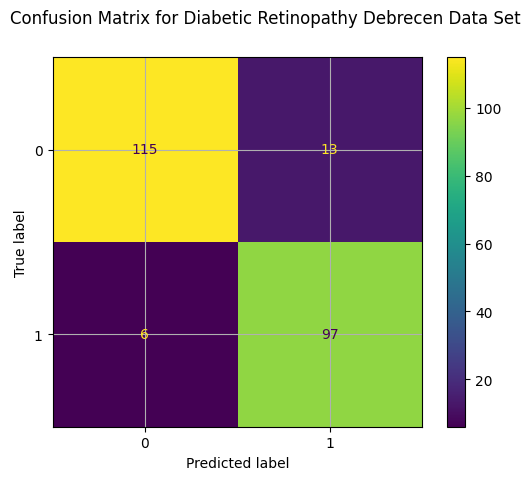

In [17]:
fig = plot_confusion_matrix(mlp_clf, X_test_scaled, y_test, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Diabetic Retinopathy Debrecen Data Set")
plt.show()

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       128
           1       0.88      0.94      0.91       103

    accuracy                           0.92       231
   macro avg       0.92      0.92      0.92       231
weighted avg       0.92      0.92      0.92       231



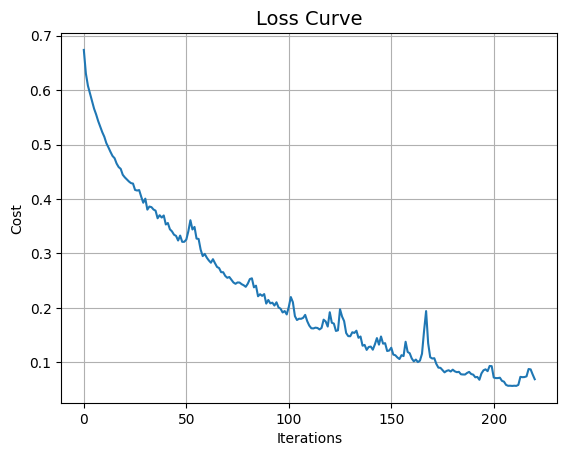

In [14]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [15]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['relu', 'tanh', 'logistic', 'identity'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive', 'invscaling'],
}

In [16]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train_scaled, y_train)

print(grid.best_params_) 

{'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (120, 80, 40), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'lbfgs'}


In [18]:
grid_predictions = grid.predict(X_test_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.78
